In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
import pandas as pd
import numpy as np

In [4]:
path_dir = '/content/drive/MyDrive/Colab Notebooks/short_data.csv'

In [5]:
dataframe = pd.read_csv(path_dir, header = None)

In [6]:
dataframe.head()

,0,1
0,Sentence,Emotion
1,언니 동생으로 부르는게 맞는 일인가요..??,공포
2,그냥 내 느낌일뿐겠지?,공포
3,아직너무초기라서 그런거죠?,공포
4,유치원버스 사고 낫다던데,공포


In [7]:
df = dataframe.iloc[1:, :]

In [8]:
df

,0,1
1,언니 동생으로 부르는게 맞는 일인가요..??,공포
2,그냥 내 느낌일뿐겠지?,공포
3,아직너무초기라서 그런거죠?,공포
4,유치원버스 사고 낫다던데,공포
5,근데 원래이런거맞나요,공포
...,...,...
38590,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38591,재미가 없으니 망하지,혐오
38592,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38593,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [9]:
x = df.iloc[:, 0]

In [10]:
y = df.iloc[:, 1]

In [11]:
x

1                                 언니 동생으로 부르는게 맞는 일인가요..??
2                                             그냥 내 느낌일뿐겠지?
3                                           아직너무초기라서 그런거죠?
4                                            유치원버스 사고 낫다던데
5                                              근데 원래이런거맞나요
                               ...                        
38590                 솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..
38591                                          재미가 없으니 망하지
38592    공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...
38593                 코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ
38594                 와이프도 그렇고 댓글 다 볼텐데 이휘재 좀 하차 하라고 전해주세요
Name: 0, Length: 38594, dtype: object

In [12]:
y

1        공포
2        공포
3        공포
4        공포
5        공포
         ..
38590    혐오
38591    혐오
38592    혐오
38593    혐오
38594    혐오
Name: 1, Length: 38594, dtype: object

In [13]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import SGD
from keras.utils import np_utils

In [14]:
np.shape(x.values)

(38594,)

In [15]:
scaled_train = x.values

In [16]:
scaled_train

array(['언니 동생으로 부르는게 맞는 일인가요..??', '그냥 내 느낌일뿐겠지?', '아직너무초기라서 그런거죠?', ...,
       '공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어진거 주워담고 그럼',
       '코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ',
       '와이프도 그렇고 댓글 다 볼텐데 이휘재 좀 하차 하라고 전해주세요'], dtype=object)

In [17]:
y = y.values

In [18]:
sss = StratifiedShuffleSplit(test_size=0.1, random_state=14)
for train_val_index, test_index in sss.split(scaled_train, y):
    X_train_val, X_test = scaled_train[train_val_index], scaled_train[test_index]
    y_train_val, y_test = y[train_val_index], y[test_index]



In [19]:
nb_features = 960   
nb_class = 7

In [20]:
np.shape(X_train_val)

(34734,)

In [21]:
np.shape(X_test)

(3860,)

In [22]:
sss2 = StratifiedShuffleSplit(test_size=0.15, random_state=13)
for train_index, val_index in sss2.split(X_train_val, y_train_val):
  X_train, X_val = X_train_val[train_index], X_train_val[val_index]
  y_train, y_val = y_train_val[train_index], y_train_val[val_index]

In [23]:
np.shape(X_train)

(29523,)

In [24]:
np.shape(X_val)

(5211,)

In [25]:
import collections

In [26]:
y_test

array(['놀람', '중립', '중립', ..., '혐오', '행복', '혐오'], dtype=object)

In [27]:
y_train

array(['놀람', '분노', '놀람', ..., '혐오', '혐오', '공포'], dtype=object)

In [28]:
y_val

array(['슬픔', '중립', '혐오', ..., '중립', '공포', '혐오'], dtype=object)

In [30]:
pip install konlpy

     |████████████████████████████████| 19.4MB 59.3MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 460kB 38.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [31]:
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [33]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [35]:
okt = Okt()
tokenized_data = []
for sentence in X_train:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [36]:
import matplotlib.pyplot as plt

리뷰의 최대 길이 : 113
리뷰의 평균 길이 : 8.176337093113844


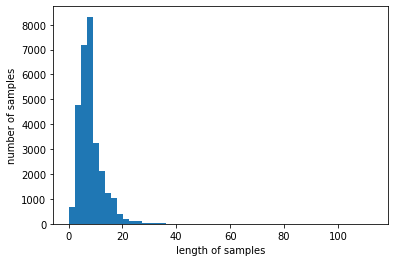

In [37]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [38]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [39]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(5284, 100)

In [42]:
print(model.wv.most_similar("아버지"))

[('세', 0.999802827835083), ('원', 0.9998025894165039), ('10', 0.9997669458389282), ('모', 0.9997539520263672), ('따르다', 0.9997529983520508), ('머리', 0.9997523427009583), ('떨어지다', 0.9997520446777344), ('당하다', 0.9997463226318359), ('불다', 0.9997439980506897), ('놓다', 0.9997398853302002)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_

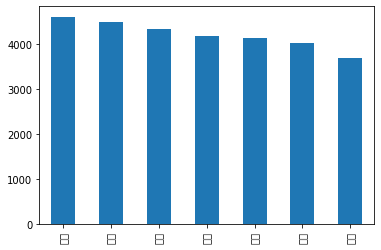

In [43]:
temp = pd.Series(y_train)
temp.value_counts().plot(kind = 'bar')

In [45]:
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [46]:
# 레이블 인코딩. 레이블에 고유한 정수를 부여
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(y_train)

y_train = idx_encode.transform(y_train) # 주어진 고유한 정수로 변환
y_test = idx_encode.transform(y_test) # 고유한 정수로 변환
y_val = idx_encode.transform(y_val)

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)

{'공포': 0, '놀람': 1, '분노': 2, '슬픔': 3, '중립': 4, '행복': 5, '혐오': 6}


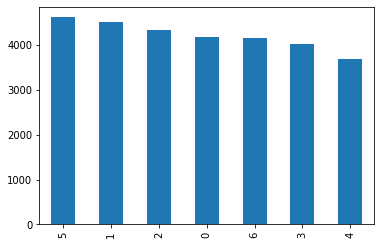

In [47]:
temp = pd.Series(y_train)
temp.value_counts().plot(kind = 'bar')

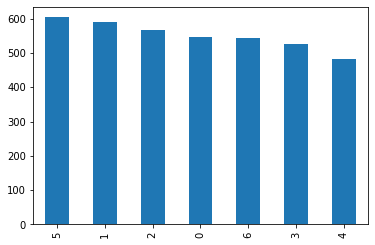

In [48]:
temp = pd.Series(y_test)
temp.value_counts().plot(kind = 'bar')

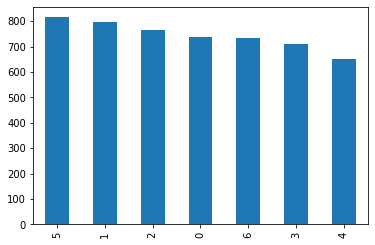

In [49]:
temp = pd.Series(y_val)
temp.value_counts().plot(kind = 'bar')

In [50]:
print(X_train[:5])

['어떻게 한 순간에 이렇게 됐지?' '조의연 잊지않겠다' '뭐라고 생각해야하는 거임?참...'
 '이번 태연양의 생일을 통해서 형돈이 형이 로맨틱한(?)면도 있다고 전국 국민들에게 알립시다..'
 '새누리는 김무성란인빼고 전부내려오고 민주당은 추미애 당장 짤라라']


In [51]:
print(y_train[:5])

[1 2 1 5 2]


In [52]:
print(tokenized_data[:5])

[['어떻다', '순간', '이렇게', '돼다', '?'], ['조의연', '잊다', '않다'], ['뭐라다', '생각', '거임', '?', '차다', '...'], ['이번', '태연', '양', '생일', '을', '통해', '서', '형돈이', '형', '로맨틱', '(?)', '면도', '있다', '전국', '국민', '에게', '알리다', '..'], ['새누리', '김무성', '란', '인', '빼다', '전부', '내려오다', '민주당', '추미애', '당장', '짤', '라라']]


In [53]:
X_train_tk = []
for sentence in X_train:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train_tk.append(temp_X)






In [54]:
X_test_tk = []
for sentence in X_test:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test_tk.append(temp_X)

In [55]:
X_val_tk = []
for sentence in X_val:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_val_tk.append(temp_X)

In [57]:
print(X_train_tk[:5])
print(X_test_tk[:5])
print(X_val_tk[:5])

[['어떻다', '순간', '이렇게', '돼다', '?'], ['조의연', '잊다', '않다'], ['뭐라다', '생각', '거임', '?', '차다', '...'], ['이번', '태연', '양', '생일', '을', '통해', '서', '형돈이', '형', '로맨틱', '(?)', '면도', '있다', '전국', '국민', '에게', '알리다', '..'], ['새누리', '김무성', '란', '인', '빼다', '전부', '내려오다', '민주당', '추미애', '당장', '짤', '라라']]
[['개리', '선견지명', '지리다', '....'], ['당황', '모습', '역', '력', '.'], ['기브', '앤', '테이크', '맞다', '...'], ['어제', '수영', '경기', '줄줄이', '틀어주다', '유독', '선수', '경', '기전', '수경', '을', '눈', '딱', '들러붙다', '손', '자다', '씌우다', '수영장', '물때', '메', '그렇다', '...??'], ['류현진', '급', '명', '영', '입', '해오다']]
[['아니다', '제', '잊다', '가요'], ['그렇다', '자리다', '경차', '간신히', '들어가다', '~', 'ㅋ'], ['이목', '끌다', '볼라', '고', '애쓰다'], ['양초', '불', '을', '짚여', '라', '저년', '잡다', '....'], ['흠', '.......', '성폭행', '당하다', '같다', '..']]


In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tk)
tokenizer.fit_on_texts(X_test_tk)
tokenizer.fit_on_texts(X_val_tk)

In [63]:
print(tokenizer.word_index)

{'.': 1, '?': 2, '..': 3, '을': 4, '...': 5, '있다': 6, '보다': 7, '되다': 8, '없다': 9, '다': 10, '아니다': 11, '이다': 12, '같다': 13, '안': 14, '진짜': 15, '로': 16, '너무': 17, '에서': 18, '요': 19, '못': 20, '저': 21, '사람': 22, '만': 23, ',': 24, '좋다': 25, '!': 26, '나': 27, '고': 28, '오다': 29, '아': 30, '가다': 31, 'ㅠㅠ': 32, '그': 33, '~': 34, '그렇다': 35, '받다': 36, '....': 37, '않다': 38, '들다': 39, '하고': 40, '정말': 41, '왜': 42, '것': 43, '말': 44, '네': 45, '??': 46, '더': 47, '때': 48, '제': 49, '나오다': 50, '먹다': 51, '게': 52, '알다': 53, '어떻다': 54, '거': 55, '내': 56, '생각': 57, '모르다': 58, 'ㅋㅋ': 59, '많다': 60, '뭐': 61, '라': 62, '일': 63, '인데': 64, '까지': 65, '!!': 66, '돈': 67, '나라': 68, '하': 69, '국민': 70, '지금': 71, '인': 72, '적': 73, '그냥': 74, '지': 75, '니': 76, '이렇다': 77, '개': 78, '많이': 79, '면': 80, '이제': 81, '야': 82, '한테': 83, '나다': 84, '자다': 85, 'ㅋㅋㅋ': 86, '님': 87, '맞다': 88, '우리': 89, '부터': 90, '해주다': 91, '근데': 92, '또': 93, '~~': 94, '안되다': 95, 'ㅠ': 96, '이나': 97, '놈': 98, '서': 99, '오늘': 100, '시키다': 101, '여자': 102, '대통령': 103, '차다'

In [64]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 24695
등장 빈도가 2번 이하인 희귀 단어의 수: 15353
단어 집합에서 희귀 단어의 비율: 62.170479854221504
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.966809503283551


In [65]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9344


In [66]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train_tk)
X_train = tokenizer.texts_to_sequences(X_train_tk)
X_test = tokenizer.texts_to_sequences(X_test_tk)
X_val = tokenizer.texts_to_sequences(X_val_tk)

In [68]:
print(X_train[:5])
print(X_test[:5])
print(X_val[:5])

[[56, 710, 127, 169, 3], [4048, 546, 38], [593, 59, 2788, 3, 108, 6], [217, 5285, 367, 433, 5, 2448, 98, 4049, 412, 1, 3025, 1, 8, 2315, 72, 145, 3026, 4], [883, 4050, 1368, 75, 407, 777, 858, 2789, 7978, 758, 1574, 3290]]
[[1, 1, 1984, 35], [1104, 276, 2329, 930, 2], [1, 1, 1, 90, 6], [279, 4426, 460, 7737, 1, 3204, 153, 829, 2458, 1, 5, 256, 387, 1, 465, 83, 2753, 7126, 1, 1111, 42, 2725], [5124, 450, 226, 564, 358, 1851]]
[[12, 49, 546, 283], [42, 6082, 8145, 1, 342, 39, 144], [1, 2237, 8099, 28, 4481], [1, 761, 5, 1, 63, 3168, 248, 35], [3220, 671, 2567, 416, 14, 4]]


In [ ]:
#사전 훈련된 워드 임베딩 사용 - 삭제하기

In [70]:
# 삭제

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-03 13:36:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-03 13:36:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-03 13:36:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [69]:
#삭제
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

NameError: ignored

리뷰의 최대 길이 : 113
리뷰의 평균 길이 : 8.176337093113844


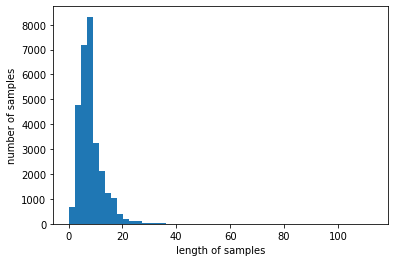

In [71]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [72]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [75]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 99.72902482810012


In [76]:
max_len = 25
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 99.32256207025031


In [88]:
# 길이 25로 padding
max_len =25 

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)

In [78]:
# 1. LSTM 사용하여 분류해보기

In [79]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [80]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [81]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [93]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_data=(X_val, y_val))

Epoch 1/15


InvalidArgumentError: ignored

In [90]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

121/121 [==============================] - 1s 10ms/step - loss: -2151.4324 - acc: 0.1609

 테스트 정확도: 0.1609


In [95]:
# 이상 실패... 1dCNN 사용

In [99]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [100]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [101]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [102]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [103]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [104]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_data = (X_val, y_val), verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 00001: val_acc improved from -inf to 0.15295, saving model to CNN_model.h5
462/462 - 28s - loss: -4.4712e+06 - acc: 0.1527 - val_loss: -2.2947e+07 - val_acc: 0.1529
Epoch 2/10

Epoch 00002: val_acc did not improve from 0.15295
462/462 - 26s - loss: -1.6361e+08 - acc: 0.1528 - val_loss: -4.0239e+08 - val_acc: 0.1529
Epoch 3/10

Epoch 00003: val_acc did not improve from 0.15295
462/462 - 26s - loss: -1.0783e+09 - acc: 0.1528 - val_loss: -1.8977e+09 - val_acc: 0.1529
Epoch 4/10

Epoch 00004: val_acc did not improve from 0.15295
462/462 - 26s - loss: -3.6530e+09 - acc: 0.1528 - val_loss: -5.4051e+09 - val_acc: 0.1529
Epoch 5/10

Epoch 00005: val_acc did not improve from 0.15295
462/462 - 26s - loss: -8.8090e+09 - acc: 0.1528 - val_loss: -1.1814e+10 - val_acc: 0.1529
Epoch 6/10

Epoch 00006: val_acc did not improve from 0.15295
462/462 - 26s - loss: -1.7544e+10 - acc: 0.1528 - val_loss: -2.2019e+10 - val_acc: 0.1529
Epoch 7/10

Epoch 00007: val_acc did not improve from 0.1

In [105]:
loaded_model = load_model('CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

121/121 [==============================] - 1s 7ms/step - loss: -23015896.0000 - acc: 0.1528

 테스트 정확도: 0.1528
